In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import tree
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score, roc_curve
def encoder(df):
    mapeo = {'Yes': 1, 'No': 0}
    df['Holiday']=df['Holiday'].map(mapeo)
    df['Weekend Return']=df['Weekend Return'].map(mapeo)
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10',  'TM'])
    df = df.astype(float)

    return df

def xgboost_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Holiday', 'Weekend Return', 'Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']])
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=400, subsample=0.9)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Assuming your model is named 'model' and is already trained
    xgb.plot_importance(model)
    plt.title("XGBoost Feature Importance")
    plt.show()
    
    
    # Calculate other evaluation metrics
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Optionally, visualize the confusion matrix

    plt.figure(figsize=(8, 6), dpi=300)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    sensitivity = tpr[np.argmax(tpr - fpr)]
    specificity = 1 - fpr[np.argmax(tpr - fpr)]
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)

    # Optionally, plot feature importances (requires matplotlib)
    xgb.plot_importance(model)
    plt.show()
    df1=pd.read_csv('final_dataset.csv')
    df_final=df1[['Day','Holiday', 'Weekend Return', 'Time_Segment', 'VVM10', 'Season', 'TM', 'Week_day', 'Vacation_week', 'Exceeds Threshold']][4014:4056]
    df_final['Prediction']=y_pred[291:333]
    print("datasetfinal", df_final)
    accuracy_f = accuracy_score(y_test[291:333], y_pred[291:333])
    print("Accuracy final:", accuracy_f)
    
    print(df_final.to_string(index=False))
    df_final.to_csv('tabla_final.csv', index=False)
    return df_final
    

    

def main():
    xgboost_model()

C:\Users\julsd\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Accuracy: 0.8203957382039574


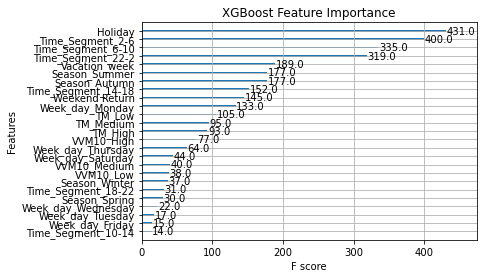

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.80       326
         1.0       0.78      0.90      0.83       331

    accuracy                           0.82       657
   macro avg       0.83      0.82      0.82       657
weighted avg       0.83      0.82      0.82       657

Confusion Matrix:
[[241  85]
 [ 33 298]]


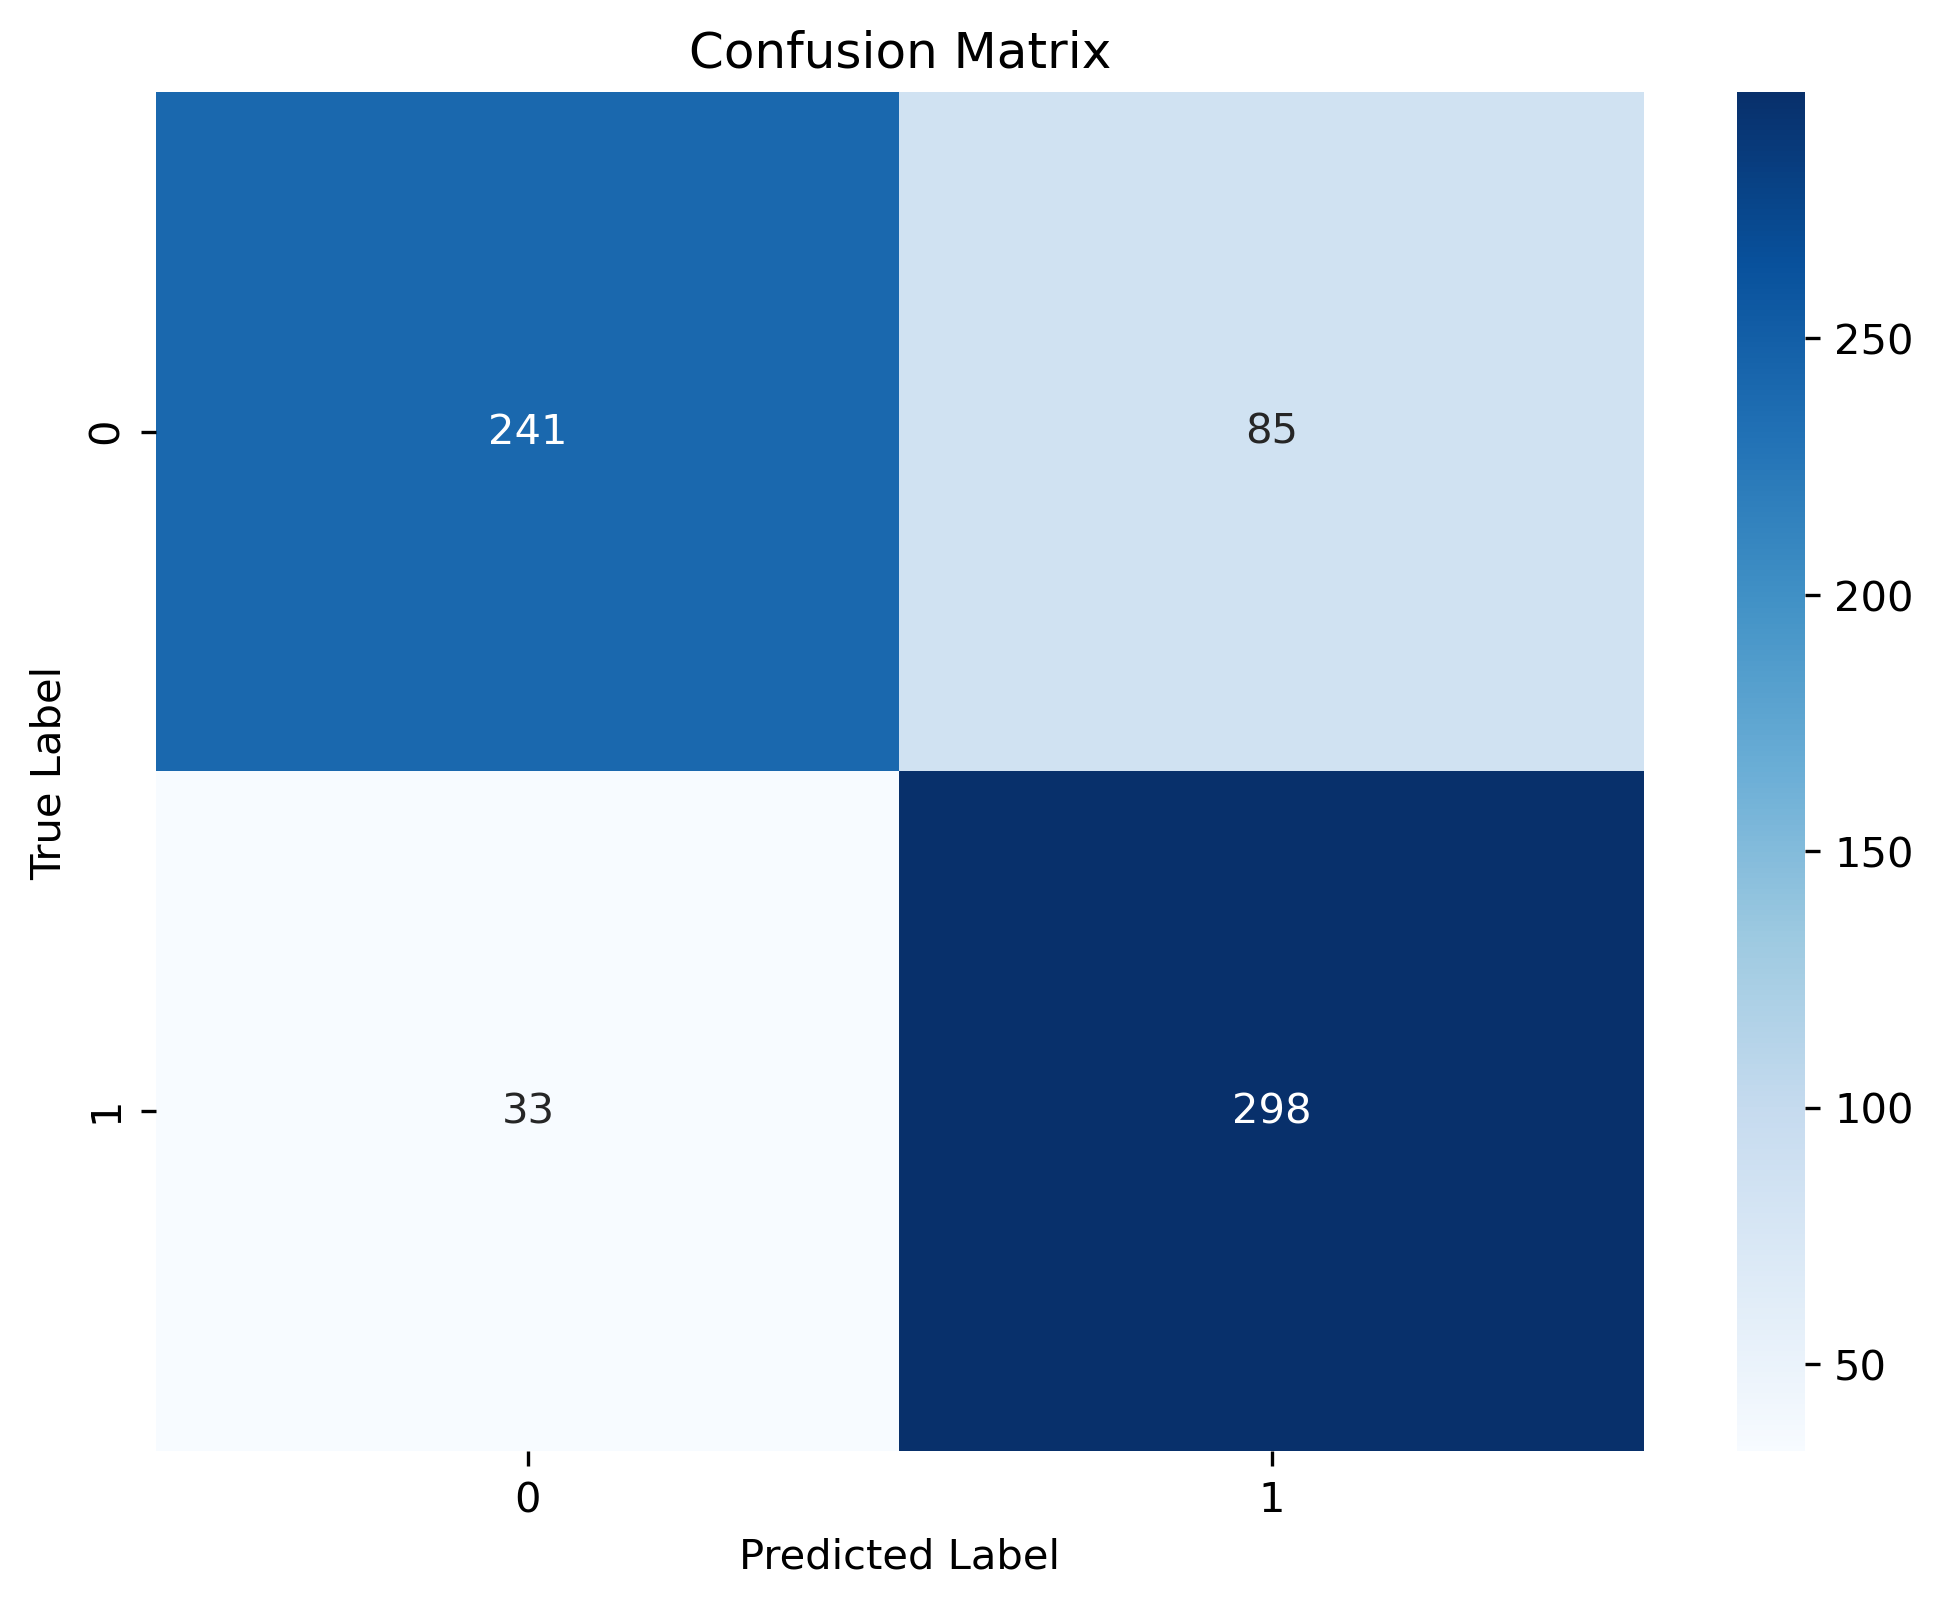

Sensitivity: 0.9003021148036254
Specificity: 0.7392638036809815


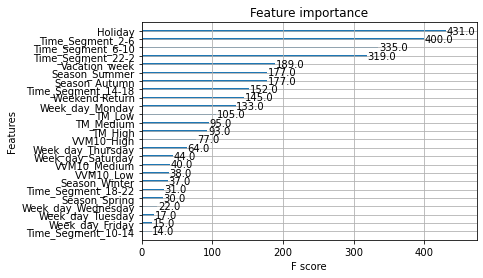

datasetfinal              Day Holiday Weekend Return Time_Segment   VVM10  Season      TM  \
4014  2022-11-01      No             No          2-6  Medium  Autumn  Medium   
4015  2022-11-01      No             No         6-10  Medium  Autumn  Medium   
4016  2022-11-01      No             No        10-14  Medium  Autumn  Medium   
4017  2022-11-01      No             No        14-18  Medium  Autumn  Medium   
4018  2022-11-01      No             No        18-22  Medium  Autumn  Medium   
4019  2022-11-01      No             No         22-2  Medium  Autumn  Medium   
4020  2022-11-02      No             No          2-6  Medium  Autumn  Medium   
4021  2022-11-02      No             No         6-10  Medium  Autumn  Medium   
4022  2022-11-02      No             No        10-14  Medium  Autumn  Medium   
4023  2022-11-02      No             No        14-18  Medium  Autumn  Medium   
4024  2022-11-02      No             No        18-22  Medium  Autumn  Medium   
4025  2022-11-02      No   

In [4]:
main()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import pandas as pd

def encoder(df):
    df=pd.get_dummies(df, columns=['Time_Segment', 'Season', 'Week_day', 'VVM10', 'PPT'])
    df = df.astype(float)
    return df

def get_feature_importance_percentage(model):
    feature_importance = model.feature_importances_
    total_importance = feature_importance.sum()
    feature_importance_percentage = (feature_importance / total_importance) * 100
    return feature_importance_percentage

def xgboost_model():
    df=pd.read_csv('dataset.csv')
    df = encoder(df[['Time_Segment', 'Season', 'Week_day','Vacation_week','PPT', 'VVM10','Exceeds Threshold']])
    
    # Split the data into features (X) and target (y)
    X = df.drop('Exceeds Threshold', axis=1)
    y = df['Exceeds Threshold']

    # Manually split the dataset (80% train, 20% test)
    split_index = int(len(df) * 0.85)
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]

    # Initialize and train the XGBoost model
    model = xgb.XGBClassifier(colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=2, n_estimators=400, subsample=0.9)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Get feature importance in percentage
    feature_importance_percentage = get_feature_importance_percentage(model)

    # Print feature importance in percentage
    print("Feature Importance in Percentage:")
    for feature, importance in zip(X.columns, feature_importance_percentage):
        print(f"{feature}: {importance:.2f}%")

    # Calculate other evaluation metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(conf_matrix)

xgboost_model()
